Mounting Drive

In [ ]:
USE_G_COLAB = True

if USE_G_COLAB:
    from google.colab import drive

    
    drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
root_dir = ''

if USE_G_COLAB:
    root_dir = '/content/drive/My Drive/'

Installing required packages

In [ ]:
!pip install -q tensorflow-gpu==2.0.0-beta1
!pip install -qU watermark

In [ ]:
mpl_style = "https://gist.githubusercontent.com/m3hrdadfi/af8aca01094afb7d3e5b46de9ad8d509/raw/871ec5d721a3b438c3c896718ea4aafc91ea9744/gadfly.mplstyle"

!wget -q $mpl_style -O /root/.config/matplotlib/matplotlibrc

In [ ]:
RANDOM_SEED = 141

In [ ]:
import tensorflow as tf


import requests
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import shuffle

import matplotlib as mpl
import matplotlib.pyplot as plt

import cv2

import random
import sys
import io
import re
import time
from datetime import datetime
import os
import struct
import itertools
from tqdm import tqdm
import glob
from PIL import Image

from pprint import pprint


%matplotlib inline
mpl.rc_file(mpl.matplotlib_fname())
#tfds.disable_progress_bar()


Dataset

In [ ]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
!unzip -q kagglecatsanddogs_3367a.zip
!ls

--2019-07-26 17:37:14--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 184.27.136.156, 2600:1402:f000:393::e59, 2600:1402:f000:39c::e59
Connecting to download.microsoft.com (download.microsoft.com)|184.27.136.156|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_3367a.zip.2’

kagglecatsanddogs_3 100%[===================>] 786.68M   136MB/s    in 8.4s    

2019-07-26 17:37:23 (93.4 MB/s) - ‘kagglecatsanddogs_3367a.zip.2’ saved [824894548/824894548]

replace PetImages/Cat/0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
 drive				 kagglecatsanddogs_3367a.zip.2	'readme[1].txt'
 kagglecatsanddogs_3367a.zip	'MSR-LA - 3467.docx'		 sample_data
 kagglecatsanddogs_3367a.zip.1	 PetImages


In [ ]:
!ls PetImages/

Cat  Dog


In [ ]:
!ls PetImages/Cat

0.jpg	   11608.jpg  1966.jpg	3573.jpg  5180.jpg  6789.jpg  8396.jpg
10000.jpg  11609.jpg  1967.jpg	3574.jpg  5181.jpg  678.jpg   8397.jpg
10001.jpg  1160.jpg   1968.jpg	3575.jpg  5182.jpg  6790.jpg  8398.jpg
10002.jpg  11610.jpg  1969.jpg	3576.jpg  5183.jpg  6791.jpg  8399.jpg
10003.jpg  11611.jpg  196.jpg	3577.jpg  5184.jpg  6792.jpg  839.jpg
10004.jpg  11612.jpg  1970.jpg	3578.jpg  5185.jpg  6793.jpg  83.jpg
10005.jpg  11613.jpg  1971.jpg	3579.jpg  5186.jpg  6794.jpg  8400.jpg
10006.jpg  11614.jpg  1972.jpg	357.jpg   5187.jpg  6795.jpg  8401.jpg
10007.jpg  11615.jpg  1973.jpg	3580.jpg  5188.jpg  6796.jpg  8402.jpg
10008.jpg  11616.jpg  1974.jpg	3581.jpg  5189.jpg  6797.jpg  8403.jpg
10009.jpg  11617.jpg  1975.jpg	3582.jpg  518.jpg   6798.jpg  8404.jpg
1000.jpg   11618.jpg  1976.jpg	3583.jpg  5190.jpg  6799.jpg  8405.jpg
10010.jpg  11619.jpg  1977.jpg	3584.jpg  5191.jpg  679.jpg   8406.jpg
10011.jpg  1161.jpg   1978.jpg	3585.jpg  5192.jpg  67.jpg    8407.jpg
10012.jpg  11620.jpg  1979

In [ ]:
DATASET_DIR = os.path.join('PetImages')
IMAGE_WIDTH_SIZE, IMAGE_HEIGHT_SIZE = 150, 150
LABEL = ['DOG', 'CAT']

In [ ]:
def _label(filename):
    return 1 if filename == 'cat' else 0

In [ ]:
def create_dataset(path, classes=['Cat', 'Dog']):
    x = []
    y = []
    
    for c in classes:
        for filepath in tqdm(glob.glob(path + '/' + c + '/' + '*.jpg'), position=0):
            img = cv2.imread(filepath)
            if not isinstance(img, (np.ndarray, np.generic)):
                continue
           
            img = cv2.resize(img, (IMAGE_WIDTH_SIZE, IMAGE_HEIGHT_SIZE))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            y.append(_label(c.lower()))
            x.append(img)
    
    x, y = shuffle(x, y, random_state=RANDOM_SEED)
    
    x = np.array(x)
    y = np.array(y)
    
    return x, y

Splitting into train, test, validation sets

In [ ]:
x, y = create_dataset(DATASET_DIR)

x_train, x_t, y_train, y_t = train_test_split(x, y, test_size=0.3, random_state=RANDOM_SEED)
x_valid, x_test, y_valid, y_test = train_test_split(x_t, y_t, test_size=0.8, random_state=RANDOM_SEED)


print("Train: \tx:%s\ty:%s" % (x_train.shape, y_train.shape))
print("Valid: \tx:%s\ty:%s" % (x_valid.shape, y_valid.shape))
print("Test: \tx:%s\ty:%s" % (x_test.shape, y_test.shape))

100%|██████████| 12500/12500 [00:30<00:00, 411.82it/s]


Train: 	x:(17462, 150, 150, 3)	y:(17462,)
Valid: 	x:(1496, 150, 150, 3)	y:(1496,)
Test: 	x:(5988, 150, 150, 3)	y:(5988,)


Visualizing the dataset

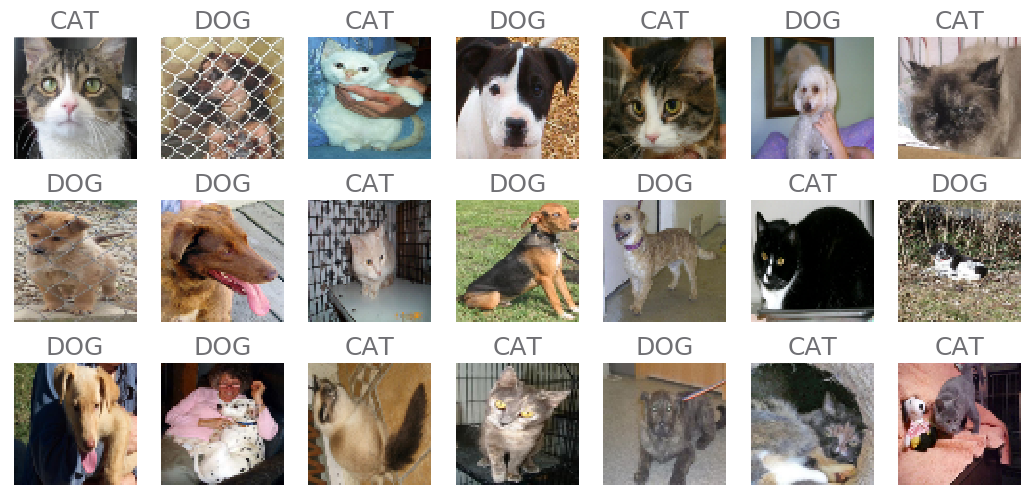

In [ ]:
cols = 7
rows = 3
fig = plt.figure(figsize=(13, 6))
for i in range(cols * rows):
    img = x_train[i]
    lbl = y_train[i]
    
    img = cv2.resize(img, (64, 64))
    fig.add_subplot(rows, cols, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img)
    plt.title(LABEL[lbl])
plt.show()

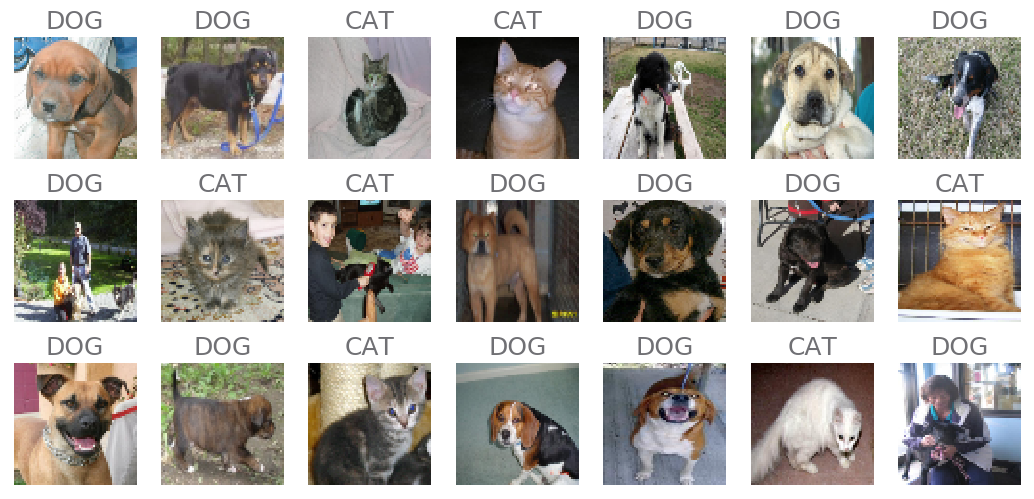

In [ ]:
cols = 7
rows = 3
fig = plt.figure(figsize=(13, 6))
for i in range(cols * rows):
    img = x_test[i]
    lbl = y_test[i]
    
    img = cv2.resize(img, (64, 64))
    fig.add_subplot(rows, cols, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img)
    plt.title(LABEL[lbl])
    
plt.show()

Preprocessing the data (scaling into numbers between 0,1)

In [ ]:
x_train_scaled = x_train.astype(np.float32) / 255.0
x_valid_scaled = x_valid.astype(np.float32) / 255.0
x_test_scaled = x_test.astype(np.float32) / 255.0


print('X Train: %s => Scaled: %s' % (x_train[0, 0, 0], x_train_scaled[0, 0, 0]))
print('X Valid: %s => Scaled: %s' % (x_valid[0, 0, 0], x_valid_scaled[0, 0, 0]))
print('X Test: %s  => Scaled: %s' % (x_test[0, 0, 0], x_test_scaled[0, 0, 0]))

X Train: [252 252 252] => Scaled: [0.9882353 0.9882353 0.9882353]
X Valid: [134 129 135] => Scaled: [0.5254902 0.5058824 0.5294118]
X Test: [ 89 160 210]  => Scaled: [0.34901962 0.627451   0.8235294 ]


Model

In [ ]:
def build_model():
    
    model = tf.keras.Sequential([
        #CNN Layer 1
        tf.keras.layers.Conv2D(kernel_size=3, filters=32, input_shape=(150, 150, 3), padding='same', activation='relu'),
        tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=2),
        #CNN Layer 2
        tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same', activation='relu'),
        tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same', activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=2),
        #CNN Layer 3
        tf.keras.layers.Conv2D(kernel_size=3, filters=128, padding='same', activation='relu'),
        tf.keras.layers.Conv2D(kernel_size=3, filters=128, padding='same', activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=2),
        #CNN Layer 4
        tf.keras.layers.Conv2D(kernel_size=3, filters=256, padding='same', activation='relu'),
        tf.keras.layers.Conv2D(kernel_size=3, filters=256, padding='same', activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=2),
        #Flatten
        tf.keras.layers.Flatten(),
        #Dense
        tf.keras.layers.Dense(units=256, activation='relu'),
        tf.keras.layers.Dropout(rate=0.5),
        tf.keras.layers.Dense(units=256, activation='relu'),
        tf.keras.layers.Dropout(rate=0.5),
        #Output
        tf.keras.layers.Dense(units=2, activation='softmax')
        
    ])
    
    opt = tf.keras.optimizers.RMSprop(lr=1e-4)
    
    model.summary()
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    r = model.fit(x_train_scaled, y_train, validation_data=(x_valid_scaled, y_valid), epochs=32, batch_size=16, verbose=1)
    
    evaluate = model.evaluate(x_test_scaled, y_test, verbose=2)
    
    return model, r, evaluate

In [ ]:
model, r, evaluate = build_model()
evaluate

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 150, 150, 32)      9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 75, 75, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 37, 37, 128)      

[0.33676083981692195, 0.91449565]

Plotting Loss and Accuracy of train/ validation data

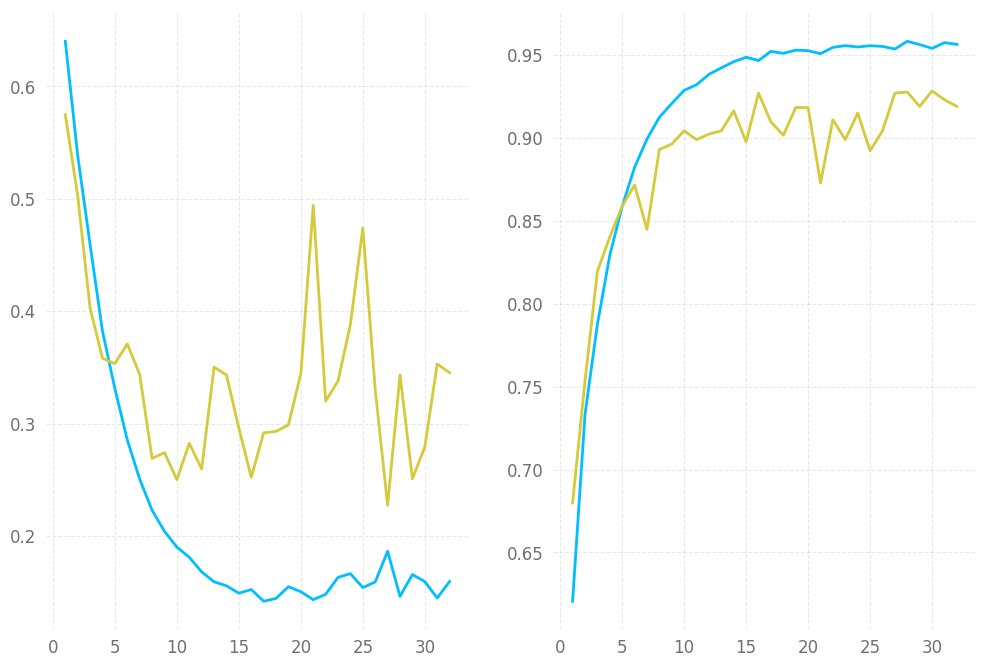

In [ ]:
history = r.history

Epochs = range(1, len(history['loss']) + 1)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(Epochs, history['loss'], label='Loss')
plt.plot(Epochs, history['val_loss'], label='Valid Loss')

plt.subplot(1, 2, 2)
plt.plot(Epochs, history['accuracy'], label='Accuracy')
plt.plot(Epochs, history['val_accuracy'], label='Valid Accuracy')

Plottig predications


In [ ]:
def plot_image(i, y_pred, true_label, img):
    pred_label = np.argmax(y_pred, axis=1)
    y_pred, true_label, img = y_pred[i], true_label[i], img[i]
    
    img = cv2.resize(img, (64, 64))
    pred_label = pred_label[i]
    
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)
    
    
    if pred_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    
    tmp_label = str(pred_label)
    
    tmp_cat = "Cat: {:1.2f}%".format(y_pred[1])
    tmp_dog = "Dog: {:1.2f}%".format(y_pred[0])
    
    plt.xlabel("%s\n%s\n%s" %(tmp_label, tmp_cat, tmp_dog), color=color)

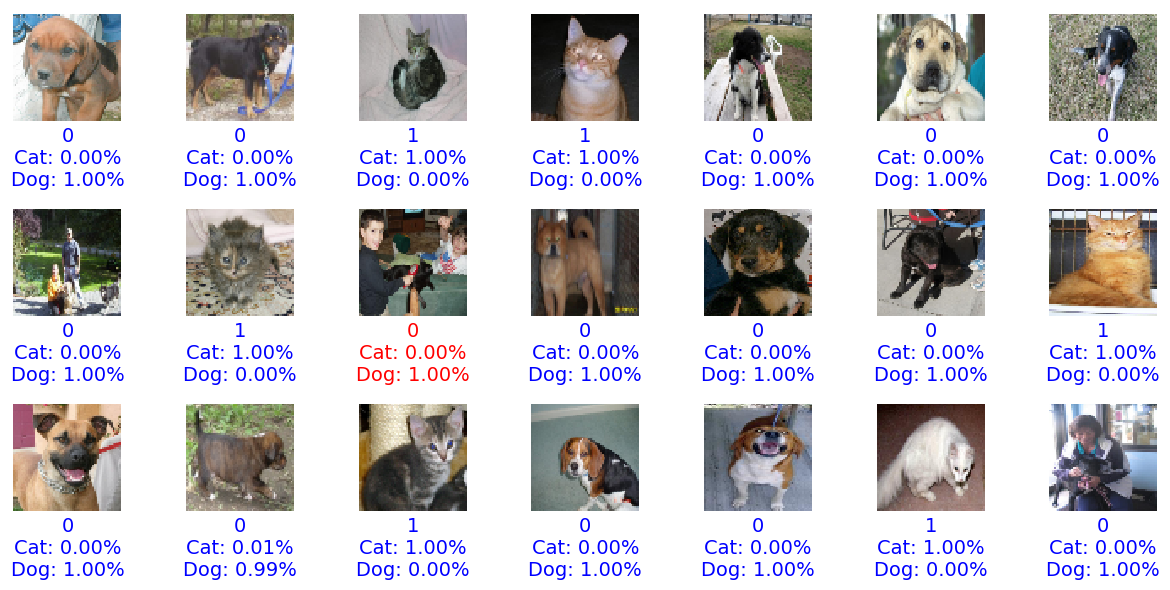

In [ ]:
y_pred = model.predict(x_test_scaled)

cols = 7
rows = 3

fig = plt.figure(figsize=(13, 6))
for i in range(cols * rows):
    fig.add_subplot(rows, cols, i + 1)
    plot_image(i, y_pred, y_test, x_test_scaled)
    plt.tight_layout()
    
plt.show()

In [ ]:
ArgMax = np.argmax(y_pred, axis=1)
print(classification_report(y_test, ArgMax))
print(confusion_matrix(y_test, ArgMax))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      3005
           1       0.94      0.88      0.91      2983

    accuracy                           0.91      5988
   macro avg       0.92      0.91      0.91      5988
weighted avg       0.92      0.91      0.91      5988

[[2852  153]
 [ 359 2624]]


 این مدل با چهار لایه کانولوشن به صورت تمام رنگ میباشد
هزینه آن بالاست ولی در ازای آن دقت 92 درصد در انتخاب خروجی کلاس مورد نظر ارائه میکند
با توجه به پارامتر اف 1 